In [1]:
import numpy as np
import pandas as pd
from numba import jit
import dlc_tda_ppross as dlcp
import matplotlib.pyplot as plt
import embedding
import os
import seaborn as sns
from scipy.spatial import distance

dctry='/home/morteza/dlc_projects/Analysis/Currencodes/TDA/Visualization/dims/'

In [2]:
dims_df=pd.read_csv(dctry+'dimension_s_groups_1.csv').dropna()


dims_df=dims_df.rename(columns = {'fname': 'Treatment'}, inplace = False)
dims_df.head()

,Unnamed: 0,delta,tau,Treatment
0,0,-1.557264,0,LES
1,1,-1.964422,1,LES
2,2,-2.097385,2,LES
3,3,-2.326892,3,LES
4,4,-2.518003,4,LES


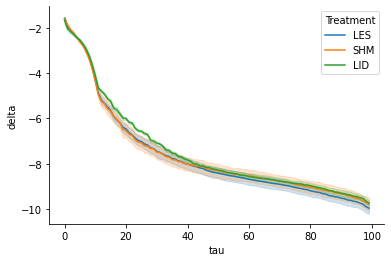

In [3]:
sns.lineplot(x='tau', y='delta', hue='Treatment', data=dims_df.loc[dims_df['Treatment'].isin(['LES','SHM', 'LID'])], ci=90)
sns.despine()

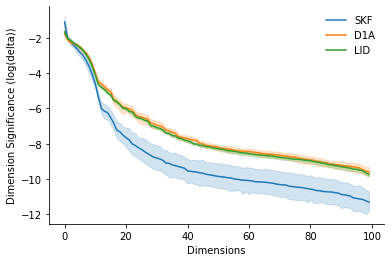

In [4]:
sns.lineplot(x='tau', y='delta', hue='Treatment', data=dims_df.loc[dims_df['Treatment'].isin(['D1A', 'LID', 'SKF'])], ci=90)


plt.xlabel('Dimensions')
plt.ylabel('Dimension Significance (log(delta))')

plt.legend(frameon=False)
sns.despine()

In [5]:
from scipy import stats
import numpy as np

g1=np.array(dims_df['delta'].loc[dims_df['Treatment']=='D1A'].loc[dims_df['tau'].isin(['0', '1']))
g2=np.array(dims_df['delta'].loc[dims_df['Treatment']=='LID'].loc[dims_df['tau'].isin(['0', '1']))

print(stats.ks_2samp(g1,g2)[1])
print(stats.ttest_ind(g1,g2)[1])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3360408878.py, line 4)

Text(0, 0.5, 'Dimension Significance (log(delta))')

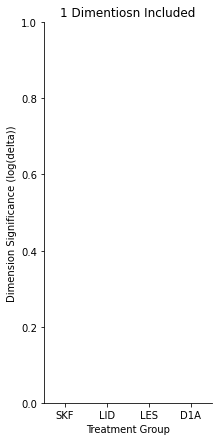

In [6]:
fig1 = plt.figure(figsize=(3, 7))
ax1=fig1.add_subplot(111)

kwrg={'width':0.3}

sns.boxplot(x='Treatment', y='delta', data=dims_df.loc[dims_df['tau'].isin(['1'])], ax=ax1,
        order=['SKF', 'LID', 'LES', 'D1A'], showfliers=False)
sns.despine()
plt.title('1 Dimentiosn Included')
plt.xlabel('Treatment Group')
plt.ylabel('Dimension Significance (log(delta))')


Text(0, 0.5, 'Dimension Significance (log(delta))')

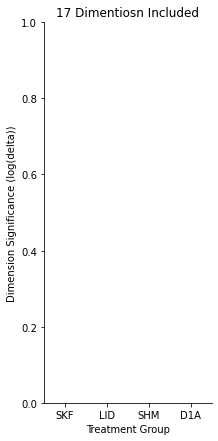

In [7]:
fig1 = plt.figure(figsize=(3, 7))
ax1=fig1.add_subplot(111)

kwrg={'width':0.3}

sns.boxplot(x='Treatment', y='delta', data=dims_df.loc[dims_df['tau'].isin(['17'])], ax=ax1,
        order=['SKF', 'LID', 'SHM', 'D1A'], showfliers=False)#, showfliers=False)
sns.despine()
plt.title('17 Dimentiosn Included')
plt.xlabel('Treatment Group')
plt.ylabel('Dimension Significance (log(delta))')

Text(0, 0.5, 'Dimension Significance (log(delta))')

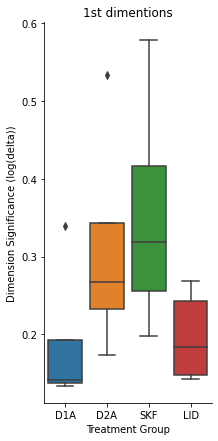

In [14]:
fig1 = plt.figure(figsize=(3, 7))
ax1=fig1.add_subplot(111)

kwrg={'width':0.3}

sns.boxplot(x='Treatment', y='delta', data=dims_df.loc[dims_df['tau'].isin([1])], ax=ax1,
        order=['D1A','D2A', 'SKF', 'LID'])#, showfliers=False)
sns.despine()
plt.title('1st dimentions')
plt.xlabel('Treatment Group')
plt.ylabel('Dimension Significance (log(delta))')

In [9]:
from scipy import stats
import numpy as np

g1=np.array(dims_df['delta'].loc[dims_df['Treatment']=='SHM'].loc[dims_df['tau']==20])
g2=np.array(dims_df['delta'].loc[dims_df['Treatment']=='LES'].loc[dims_df['tau']==20])

print(stats.ks_2samp(g1,g2)[1])
print(stats.ttest_ind(g1,g2)[1])


0.4677024778968115
0.7745182789728153


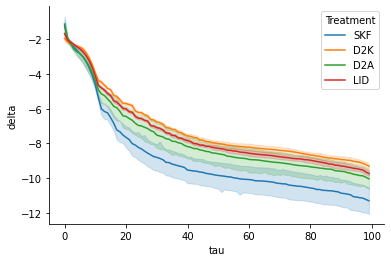

In [10]:
sns.lineplot(x='tau', y='delta', hue='Treatment', data=dims_df.loc[dims_df['Treatment'].isin(['D2K','D2A', 'SKF', 'LID'])])
sns.despine()

In [33]:


dims_df=pd.read_csv(dctry+'clum_dimension_s_groups.csv')


dims_df=dims_df.rename(columns = {'fname': 'Treatment'}, inplace = False)


shuff_df=pd.read_csv(dctry+'clum_dimension_s_shuff2.csv')


shuff_df=shuff_df.rename(columns = {'fname': 'Treatment'}, inplace = False)



final_df=dims_df.append(shuff_df)
final_df=final_df[(final_df['tau']<=10) & (final_df['tau']>0)]


shuff_df.head()


,Unnamed: 0,delta,tau,Treatment
0,0,0.000000,0,Shuffle
1,1,0.019100,1,Shuffle
2,2,0.030145,2,Shuffle
3,3,0.041177,3,Shuffle
4,4,0.052002,4,Shuffle


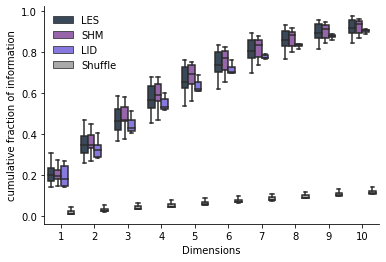

In [37]:

flatui = [ "#34495e","#9b59b6", '#7b68ee','#a9a9a9']
sns.set_palette(sns.color_palette(flatui))


sns.boxplot(x='tau', y='delta', hue='Treatment', data=final_df.loc[dims_df['Treatment'].isin(['LES', 'LID', 'SHM', 'Shuffle'])], showfliers=False)


plt.xlabel('Dimensions')
plt.ylabel('cumulative fraction of information')


plt.legend(frameon=False)
sns.despine()

plt.savefig('clum_inf.svg')